<a href="https://colab.research.google.com/github/LongNguyen1984/DeepLearning/blob/master/AutoregressionTimeSeries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

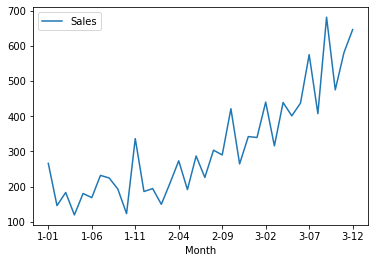

In [72]:
from pandas import read_csv
from matplotlib import pyplot
series = read_csv('drive/My Drive/Dataset/shampoo.csv', header=0, index_col=0)
series.plot()
pyplot.show()

# Time Series Visualization

1.   Line Plots.
2.   Histograms and Density Plots.
3.   Box and Whisker Plots.
4.   Heat Maps.
5.   Lag Plots or Scatter Plots.
6.   Autocorrelation Plots.

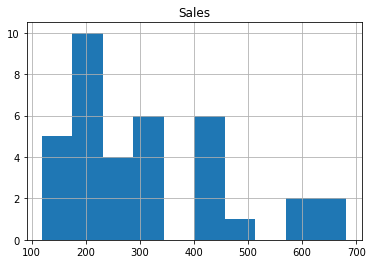

In [5]:
# Historgram and Density plots
series.hist()
pyplot.show()

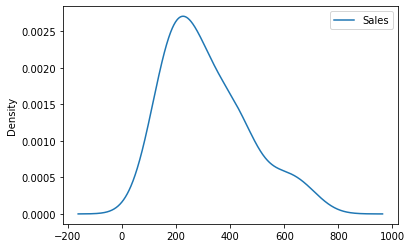

In [7]:
# density plot
series.plot(kind='kde')
pyplot.show()

In [76]:
import pandas as pd
series.shape

(36, 1)

            Temp
Date            
1981-01-01  20.7
1981-01-02  17.9
1981-01-03  18.8
1981-01-04  14.6
1981-01-05  15.8


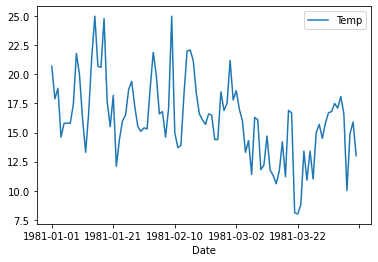

In [79]:
from pandas import read_csv
from matplotlib import pyplot
series = read_csv('drive/My Drive/Dataset/daily-min-temperatures.csv', header=0, index_col=0)
print(series.head())
series[0:100].plot()
pyplot.show()

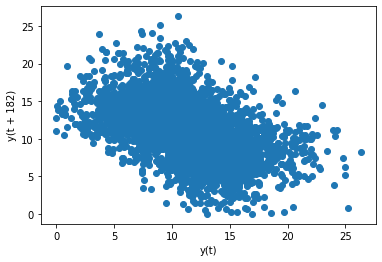

In [90]:
from pandas.plotting import lag_plot
lag_plot(series, lag=182)
pyplot.show()

In [94]:
dataframe.columns

Index(['t-1', 't+1'], dtype='object')

In [96]:
from pandas import DataFrame
from pandas import concat
values = DataFrame(series.values)
dataframe = concat([values.shift(182), values], axis=1)
dataframe.columns = ['t-7','t+7']
result = dataframe.corr()
print(result)

          t-7       t+7
t-7  1.000000 -0.505484
t+7 -0.505484  1.000000


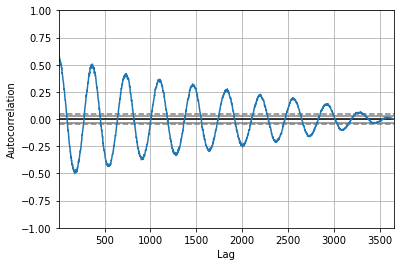

In [105]:
from pandas import read_csv
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot
series = read_csv('drive/My Drive/Dataset/daily-min-temperatures.csv', header=0, index_col=0)
autocorrelation_plot(series)
pyplot.show()

In [111]:
import statsmodels.api as sm

from pandas import read_csv
from matplotlib import pyplot
series = read_csv('drive/My Drive/Dataset/shampoo.csv', header=0, index_col=0)
values = DataFrame(series.values)
dataframe = concat([values.shift(2), values], axis=1)
dataframe.columns = ['t-','t+1']
result = dataframe.corr()
print(result)

           t-       t+1
t-   1.000000  0.850743
t+1  0.850743  1.000000


In [ ]:
!pip install git+https://github.com/statsmodels/statsmodels

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/ar_model.py:252: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  FutureWarning,


Coefficients:[ 5.57543506e-01  5.88595221e-01 -9.08257090e-02  4.82615092e-02
  4.00650265e-02  3.93020055e-02  2.59463738e-02  4.46675960e-02
  1.27681498e-02  3.74362239e-02 -8.11700276e-04  4.79081949e-03
  1.84731397e-02  2.68908418e-02  5.75906178e-04  2.48096415e-02
  7.40316579e-03  9.91622149e-03  3.41599123e-02 -9.11961877e-03
  2.42127561e-02  1.87870751e-02  1.21841870e-02 -1.85534575e-02
 -1.77162867e-03  1.67319894e-02  1.97615668e-02  9.83245087e-03
  6.22710723e-03 -1.37732255e-03]
predicted=11.871275, expected=12.900000
predicted=13.053794, expected=14.600000
predicted=13.532591, expected=14.000000
predicted=13.243126, expected=13.600000
predicted=13.091438, expected=13.500000
predicted=13.146989, expected=15.700000
predicted=13.176153, expected=13.000000
Test RMSE: 1.225


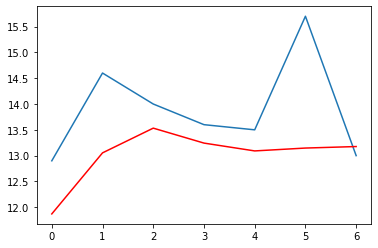

In [5]:
from pandas import read_csv
from matplotlib import pyplot
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
from math import sqrt
# load data
series = read_csv('drive/My Drive/Dataset/daily-min-temperatures.csv', header=0, index_col=0, parse_dates= True, squeeze=True)
# split data
X = series.values
train, test = X[1:len(X)-7],X[len(X)-7:]
# train autoregression
model = AutoReg(train, lags=29)
model_fit = model.fit()
print('Coefficients:%s' % model_fit.params)
# make predictions
predictions = model_fit.predict(start=len(train),end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
  print('predicted=%f, expected=%f' %(predictions[i], test[i]))

rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' %rmse)
#plot results
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/ar_model.py:252: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  FutureWarning,


predicted=11.871275, expected=12.900000
predicted=13.659297, expected=14.600000
predicted=14.349246, expected=14.000000
predicted=13.427454, expected=13.600000
predicted=13.374877, expected=13.500000
predicted=13.479991, expected=15.700000
predicted=14.765146, expected=13.000000
Test RMSE: 1.204


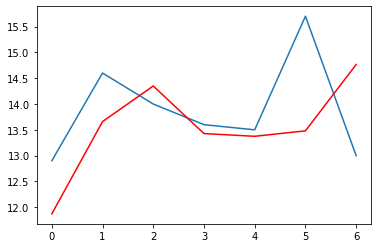

In [24]:
from pandas import read_csv
from matplotlib import pyplot
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
from math import sqrt
# load data
series = read_csv('drive/My Drive/Dataset/daily-min-temperatures.csv', header=0, index_col=0, parse_dates= True, squeeze=True)
# split data
X = series.values
train, test = X[1:len(X)-7],X[len(X)-7:]
# train autoregression
window = 29
model = AutoReg(train, lags=29)
model_fit = model.fit()
coef = model_fit.params
# walk forward over time steps in test
history = train[len(train)-window:]
history = [history[i] for i in range(len(history))] # convert to list
predictions = list()
for t in range(len(test)):
	length = len(history)
	lag = [history[i] for i in range(length-window,length)]
	yhat = coef[0]
	for d in range(window):
		yhat += coef[d+1] * lag[window-d-1]
	obs = test[t]
	predictions.append(yhat)
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

In [17]:
history

[12.9,
 8.8,
 14.7,
 14.7,
 12.7,
 13.3,
 13.2,
 16.2,
 17.3,
 20.5,
 20.2,
 19.4,
 15.5,
 14.1,
 11.0,
 11.1,
 14.0,
 11.4,
 12.5,
 13.4,
 13.6,
 13.9,
 17.2,
 14.7,
 15.4,
 13.1,
 13.2,
 13.9,
 10.0]

In [21]:
length = len(history)
lag = [history[i] for i in range(length-window,length)]
lag

[12.9,
 8.8,
 14.7,
 14.7,
 12.7,
 13.3,
 13.2,
 16.2,
 17.3,
 20.5,
 20.2,
 19.4,
 15.5,
 14.1,
 11.0,
 11.1,
 14.0,
 11.4,
 12.5,
 13.4,
 13.6,
 13.9,
 17.2,
 14.7,
 15.4,
 13.1,
 13.2,
 13.9,
 10.0]

array([ 5.57543506e-01,  5.88595221e-01, -9.08257090e-02,  4.82615092e-02,
        4.00650265e-02,  3.93020055e-02,  2.59463738e-02,  4.46675960e-02,
        1.27681498e-02,  3.74362239e-02, -8.11700276e-04,  4.79081949e-03,
        1.84731397e-02,  2.68908418e-02,  5.75906178e-04,  2.48096415e-02,
        7.40316579e-03,  9.91622149e-03,  3.41599123e-02, -9.11961877e-03,
        2.42127561e-02,  1.87870751e-02,  1.21841870e-02, -1.85534575e-02,
       -1.77162867e-03,  1.67319894e-02,  1.97615668e-02,  9.83245087e-03,
        6.22710723e-03, -1.37732255e-03])